## In this notebook, we try out a basic machine learning model

### We only work with the titles first

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install spacy
import spacy
!python -m spacy download en_core_web_md
import en_core_web_md
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
dataset = pd.read_csv('dataset_large_pre_cleaned.csv', index_col=0)

In [4]:
dataset.head()

,id,category,sub_category,title,abstract,url,entities_title,entities_abstract,nid,body,changed_categories,changed_categories_2,changed_categories_3,body_list,body_pre_cleaned,title_length_chars,abstract_length_chars,body_length_chars
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],AAGH0ET,"['The royals', ' are free to shop wherever the...",lifestyle,lifestyle,lifestyle,"['The royals', ' are free to shop wherever the...",The royals are free to shop wherever they choo...,70,73,5253
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",AAB19MK,"['When you first start dieting and exercising,...",health,health,health,"['When you first start dieting and exercising,...","When you first start dieting and exercising, t...",29,116,21543
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",AAJgNsz,"['ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked...",news,news,news,"['ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked...",Lt. Ivan Molchanets peeked over a parapet of s...,63,196,9167
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ...",AACk2N6,"['\xa0', 'I had to be perfect.', '\xa0', '\xa0...",health,health,health,"['\xa0', 'I had to be perfect.', '\xa0', '\xa0...",I had to be perfect. In order to shed my perfe...,59,99,364
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",AAAKEkt,"['As you get older, little growths called skin...",health,health,health,"['As you get older, little growths called skin...","As you get older, little growths called skin t...",57,179,3418


## Splitting the data

In [5]:
X = dataset['title']
y = dataset['changed_categories_3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Preprocessing

Steps to be included:

- stopword removal
- lemmatization
- removing digits
- removing punctuation
- lowercasing

In [6]:
from spacy.lang.en.stop_words import STOP_WORDS

In [7]:
def preprocess_text(txt):
    txt_processed = txt
    return txt_processed

In [8]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)
print(y_train[:10])
print(y_test[:10])

[10  2  2 12  7 10 10  1  8 11]
[ 9  1  9 12  3  4 12  6 12 10]


In [9]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

print(X_train_transformed[0])
print(X_test_transformed[0])

  (0, 6236)	0.4949612447519259
  (0, 9578)	0.4169110990103561
  (0, 25785)	0.3694746908759234
  (0, 12245)	0.11054155819089835
  (0, 25344)	0.4763974399733501
  (0, 1552)	0.15476750167398368
  (0, 25323)	0.42609860131535504
  (0, 26711)	0.3349897921700711
  (0, 25018)	0.2331924586117601
  (0, 24291)	0.1459304592341785
  (0, 24286)	0.25421428380083194
  (0, 22541)	0.49807993802638806
  (0, 13681)	0.4698693878476064
  (0, 6476)	0.527846236196804


In [10]:
print(X_test_transformed[0])

  (0, 26711)	0.3349897921700711
  (0, 25018)	0.2331924586117601
  (0, 24291)	0.1459304592341785
  (0, 24286)	0.25421428380083194
  (0, 22541)	0.49807993802638806
  (0, 13681)	0.4698693878476064
  (0, 6476)	0.527846236196804


In [11]:
base_model = LogisticRegression()
base_model.fit(X_train_transformed, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
base_model.score(X_test_transformed, y_test)

0.642557393236238

In [13]:
y_preds = base_model.predict(X_test_transformed)

In [14]:
f1_score(y_test, y_preds, average='weighted')

0.6439323063616632

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59       390
           1       0.86      0.82      0.84       759
           2       0.66      0.49      0.56       542
           3       0.72      0.68      0.70       680
           4       0.62      0.57      0.59       760
           5       0.71      0.68      0.69       627
           6       0.81      0.91      0.86      1676
           7       0.74      0.59      0.66       462
           8       0.54      0.49      0.51       630
           9       0.64      0.64      0.64      1389
          10       0.40      0.61      0.49      1856
          11       0.66      0.40      0.50       325
          12       0.73      0.61      0.66      1012
          13       0.61      0.37      0.46       563
          14       0.74      0.68      0.71       482

    accuracy                           0.64     12153
   macro avg       0.68      0.60      0.63     12153
weighted avg       0.66   

In [16]:
cm = confusion_matrix(y_test, y_preds)

[]

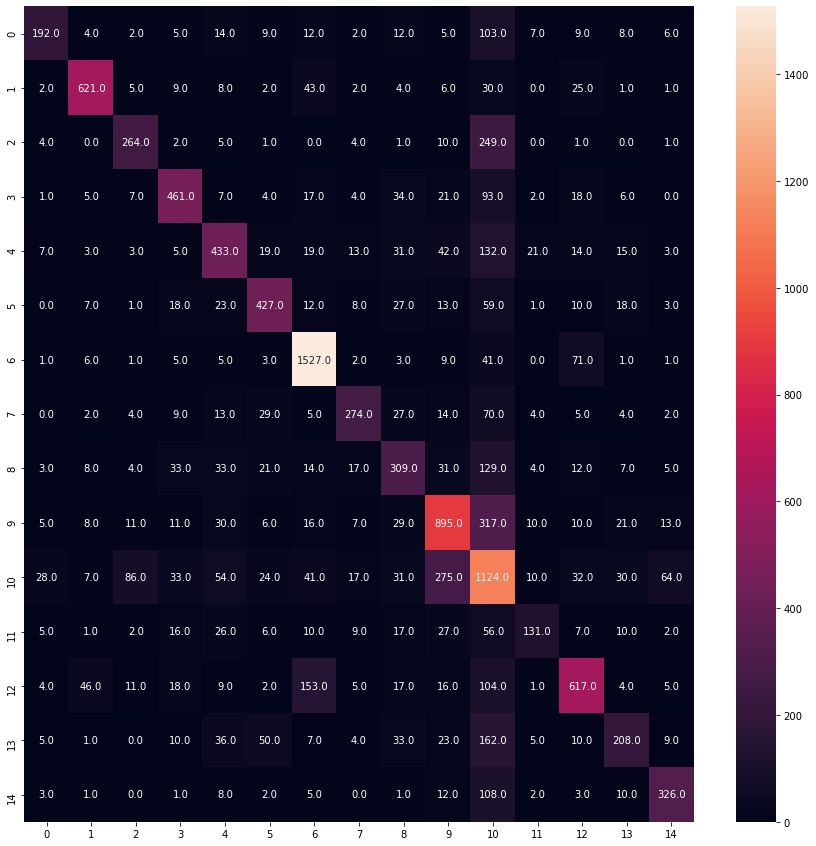

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

In [18]:
roc_auc_score(y_test, base_model.predict_proba(X_test_transformed), multi_class='ovr')

0.9396554539696911

In [19]:
base_model.predict_proba(X_test_transformed)

array([[0.00519069, 0.00852286, 0.00248336, ..., 0.01476903, 0.00720406,
        0.00382481],
       [0.02135966, 0.25083866, 0.04839493, ..., 0.09382791, 0.03277357,
        0.01611057],
       [0.00432262, 0.01269871, 0.00540527, ..., 0.00866043, 0.00449861,
        0.00311743],
       ...,
       [0.02962081, 0.05891389, 0.01064095, ..., 0.06741497, 0.11521369,
        0.01744975],
       [0.01671441, 0.05286204, 0.01906095, ..., 0.28809824, 0.03408256,
        0.02254984],
       [0.01952069, 0.0169724 , 0.01356048, ..., 0.09248992, 0.25579205,
        0.04807189]])

## Error analysis

In [20]:
test_overview = pd.DataFrame()
test_overview['text'] = X_test.values
test_overview['real_label'] = labelencoder.inverse_transform(y_test)
test_overview['preds'] = labelencoder.inverse_transform(y_preds)

In [21]:
test_overview

,text,real_label,preds
0,The Kurdish solution that Trump won't dare con...,news,news
1,Report: MLBPA investigating comment made by Al...,baseball,baseball
2,Mueller interview notes obtained by CNN show T...,news,news
3,Watch Serena Williams share a bonding moment w...,sports,entertainment
4,Christopher Reeve's Son Remembers Dad 15 Years...,entertainment,entertainment
...,...,...,...
12148,World's First Quadriplegic Drone Pilot 'Flies'...,scienceandtechnology,travel
12149,'We were blindsided': NC vet and his wife deal...,health,health
12150,"Hey, Jersey. Olga's Diner is back. | Let's Eat",foodanddrink,foodanddrink
12151,Wednesday Freedom Kicks: USL Championship expa...,sports,sports


1]CountVectorizer :"Bag-of-Words"

In [22]:
X = dataset['title']
y = dataset['changed_categories_3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(max_features=10000,ngram_range=(1,3))
cv.fit(X)
cv_train=cv.transform(X_train)
cv_test= cv.transform(X_test)

In [24]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
print(cv_train.shape,cv_test.shape)

(36458, 10000) (12153, 10000)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(max_features=10000,ngram_range=(1,3))
tfidf.fit(dataset)
tfidf_train=tfidf.transform(X_train)
tfidf_test= tfidf.transform(X_test)

In [27]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [28]:
len(tfidf.idf_)

18

In [29]:
print(tfidf_train.shape,tfidf_test.shape)

(36458, 18) (12153, 18)


TF-TDF (Term Frequency- Inverse Document Frequency):

In [30]:
print(cv_train.shape,cv_test.shape)

(36458, 10000) (12153, 10000)


Building Models

In [31]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

2] LOGISTIC REGRESSION WITH COUNTVECTORIZER

CountVectorizer is used to transform a given text into a vector on the basis of the frequency(count) of each word that occurs in the entire text.It involves counting the number of occurences each words appears in a document(text).


In [41]:
#Logistic Regression with CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

lr= LogisticRegression(penalty='l1',solver='saga')
lr.fit(cv_train,y_train)
y_pred_lr_cv= lr.predict(cv_test)
print(confusion_matrix(y_test,y_pred_lr_cv))
print(classification_report(y_test,y_pred_lr_cv))
print(accuracy_score(y_test,y_pred_lr_cv))

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[[ 223    3    7    6   11   12    7    3    9    7   63   12    6   15
     6]
 [   0  621    5   15    9    1   33    3    6    5   21    0   33    4
     3]
 [   6    2  298    7    4    1    3    6    3   16  187    1    3    2
     3]
 [   4    6   12  452    5   12   12   15   38   27   63    6   16   11
     1]
 [   9    6    4    7  435   16    8   18   35   38   94   33   24   25
     8]
 [   3    8    3   16   27  425    6   10   37   13   36    6    9   26
     2]
 [   5   19    4   10   10    3 1436    2    5   11   38    3  125    2
     3]
 [   1    1    5   12   16   31    3  285   28   18   49    3    3    3
     4]
 [   5   10    6   29   37   22    6   19  331   33   82   11   11   21
     7]
 [  13   12   13   15   41    8   15    8   36  864  292   13   15   24
    20]
 [  49   12  121   43   89   28   29   35   43  280  948   14   45   51
    69]
 [   4    1    2   11   25    8    6   14    9   24   38  152    9   17
     5]
 [   7   52   17   22   12    2  141   1

In [42]:
cm = confusion_matrix(y_test,y_pred_lr_cv)

[]

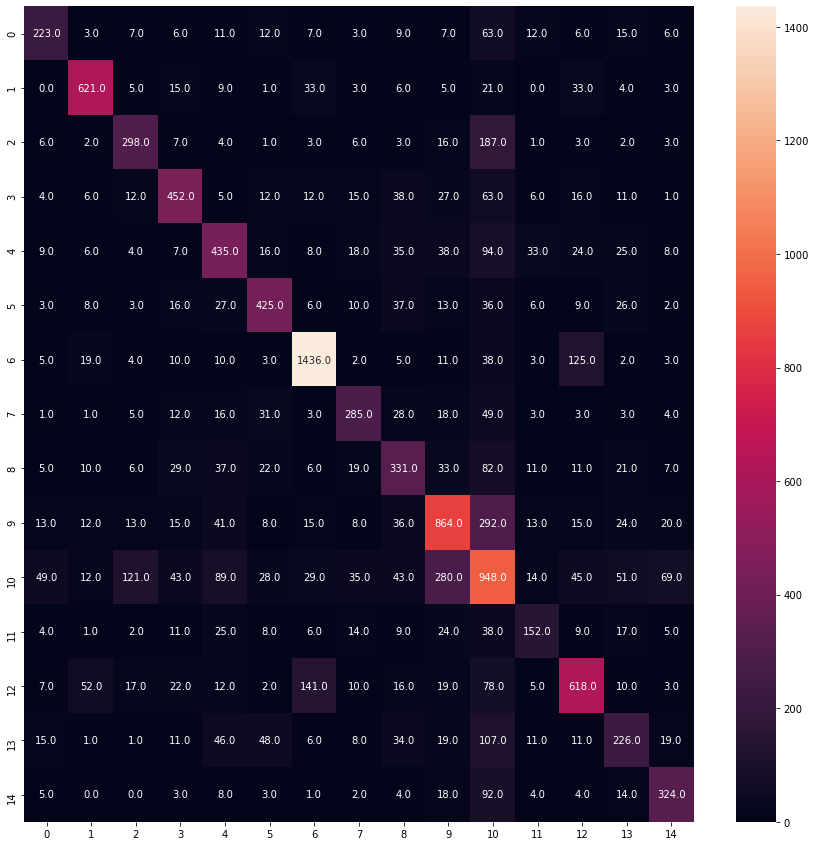

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

3] LOGISTIC REGRESSION WITH TDFIDF VECTORIZER

In [44]:
#Logistic Regression with TFIDF Vectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

lr1= LogisticRegression(penalty='l2',solver='saga')
lr1.fit(tfidf_train,y_train)
y_pred_lr1_tfidf= lr1.predict(tfidf_test)
print(confusion_matrix(y_test,y_pred_lr1_tfidf))
print(classification_report(y_test,y_pred_lr1_tfidf))
print(accuracy_score(y_test,y_pred_lr1_tfidf))

[[   0    0    2    0    0    0    0    0    0    0  388    0    0    0
     0]
 [   0    0    1    0    0    0    0    0    0    0  757    0    1    0
     0]
 [   0    0    8    0    1    0    0    0    0    0  533    0    0    0
     0]
 [   0    0    3    0    0    0    0    0    0    0  675    0    2    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  760    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  626    0    1    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 1669    0    7    0
     0]
 [   0    0   11    0    1    0    0    0    0    0  450    0    0    0
     0]
 [   0    0    4    0    0    0    0    0    0    0  625    0    1    0
     0]
 [   0    0    2    0    0    0    0    0    0    0 1386    0    1    0
     0]
 [   0    0   18    0    0    0    0    0    0    0 1838    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  325    0    0    0
     0]
 [   0    0    4    0    0    0    0    

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

               autos       0.00      0.00      0.00       390
            baseball       0.00      0.00      0.00       759
               crime       0.15      0.01      0.03       542
       entertainment       0.00      0.00      0.00       680
             finance       0.00      0.00      0.00       760
        foodanddrink       0.00      0.00      0.00       627
            football       0.00      0.00      0.00      1676
              health       0.00      0.00      0.00       462
           lifestyle       0.00      0.00      0.00       630
                news       0.00      0.00      0.00      1389
              newsus       0.15      0.99      0.26      1856
scienceandtechnology       0.00      0.00      0.00       325
              sports       0.64      0.02      0.04      1012
              travel       0.00      0.00      0.00       563
             weather       0.00      0.00      0.00       482

      

In [45]:
cm = confusion_matrix(y_test,y_pred_lr1_tfidf)

[]

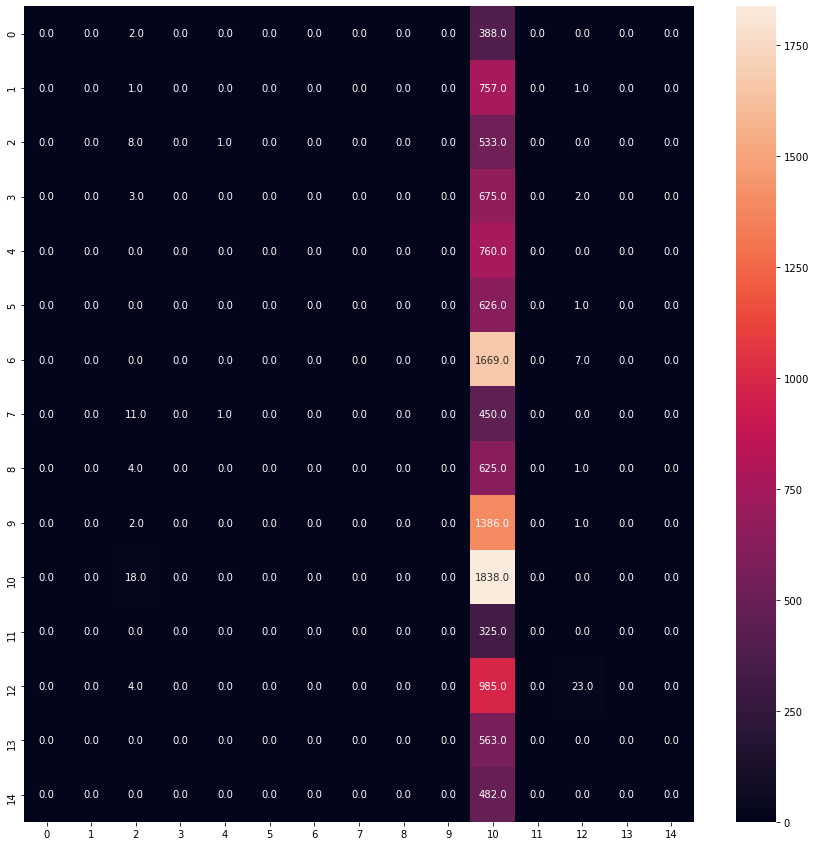

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

4]NAIVE BAYES WITH COUNTVECTORIZER

In [47]:
#Naive Bayes with CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

nv= MultinomialNB(alpha=0.1)
nv.fit(cv_train,y_train)
y_pred_nv_cv= nv.predict(cv_test)
print(confusion_matrix(y_test,y_pred_nv_cv))
print(classification_report(y_test,y_pred_nv_cv))
print(accuracy_score(y_test,y_pred_nv_cv))

[[ 219    3   12    6   21   14    5    8   14    3   28   15    9   26
     7]
 [   0  614    6    8    6    2   33    6    7    7   20    2   44    3
     1]
 [  13    2  399    6    4    0    1    6    5   18   86    1    0    1
     0]
 [   7   10   21  444    9   14    9   18   39   20   36   11   25   15
     2]
 [  10    6    4   12  423   22   10   28   35   49   69   31   13   40
     8]
 [   3    5    7   16   29  434    3   22   29    8   21    9    5   31
     5]
 [   4   21    6   14    8    8 1436   11    5   10   22    4  117    5
     5]
 [   1    2   11   16   16   25    1  295   35   10   34    7    7    2
     0]
 [   4    9   10   50   29   30    2   46  299   20   70   14   15   25
     7]
 [  13    8   36   22   43   11   12   16   45  900  169   20   12   47
    35]
 [  71   13  258   47  123   43   21   43   38  332  589   21   40   90
   127]
 [  14    2    4   13   28    7    1   10   19   21   21  159    5   12
     9]
 [   7   66   26   30   21    4  133    

In [48]:
cm = confusion_matrix(y_test,y_pred_nv_cv)

[]

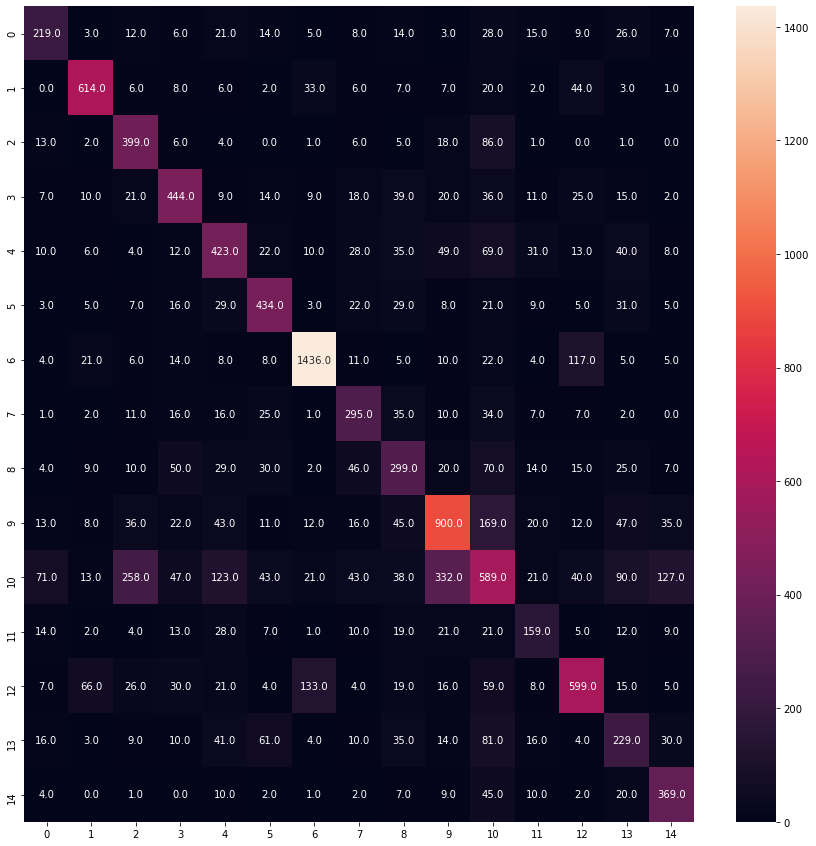

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

5]NAIVE BAYES WITH COUNTVECTORIZER

In [50]:
#Naive Bayes with Tf-idf Vectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

nv1= MultinomialNB(alpha=0.1)
nv1.fit(tfidf_train,y_train)
y_pred_nv1_tfidf= nv.predict(cv_test)
print(confusion_matrix(y_test,y_pred_nv1_tfidf))
print(classification_report(y_test,y_pred_nv1_tfidf))
print(accuracy_score(y_test,y_pred_nv1_tfidf))

[[ 219    3   12    6   21   14    5    8   14    3   28   15    9   26
     7]
 [   0  614    6    8    6    2   33    6    7    7   20    2   44    3
     1]
 [  13    2  399    6    4    0    1    6    5   18   86    1    0    1
     0]
 [   7   10   21  444    9   14    9   18   39   20   36   11   25   15
     2]
 [  10    6    4   12  423   22   10   28   35   49   69   31   13   40
     8]
 [   3    5    7   16   29  434    3   22   29    8   21    9    5   31
     5]
 [   4   21    6   14    8    8 1436   11    5   10   22    4  117    5
     5]
 [   1    2   11   16   16   25    1  295   35   10   34    7    7    2
     0]
 [   4    9   10   50   29   30    2   46  299   20   70   14   15   25
     7]
 [  13    8   36   22   43   11   12   16   45  900  169   20   12   47
    35]
 [  71   13  258   47  123   43   21   43   38  332  589   21   40   90
   127]
 [  14    2    4   13   28    7    1   10   19   21   21  159    5   12
     9]
 [   7   66   26   30   21    4  133    

In [51]:
cm = confusion_matrix(y_test,y_pred_nv1_tfidf)

[]

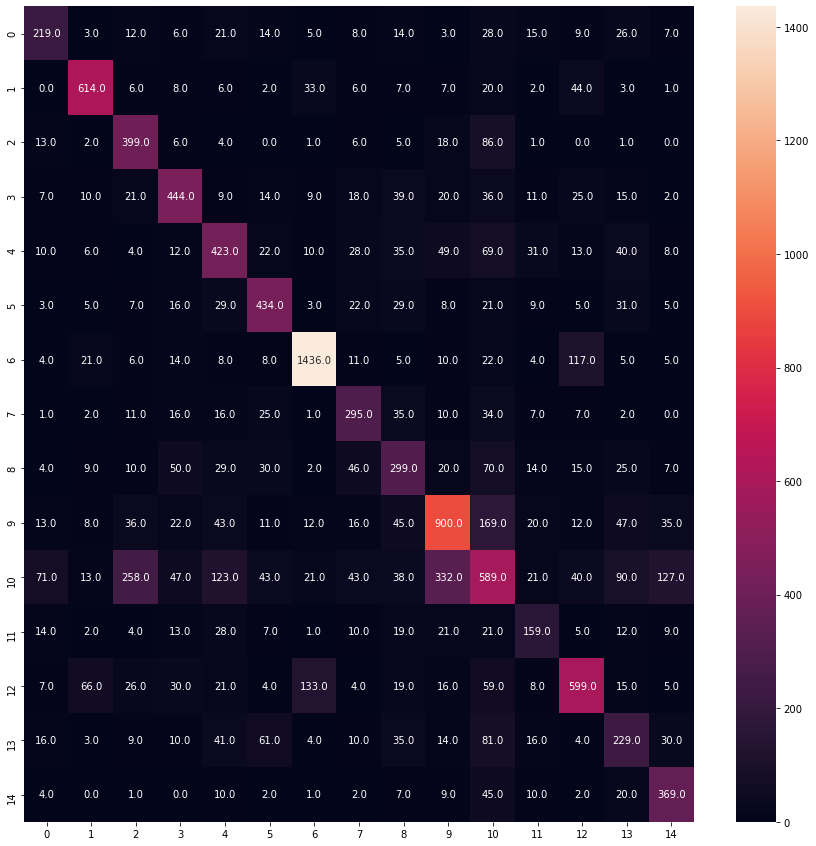

In [52]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

6] LINEAR SVM WITH COUNTVECTORIZER

In [53]:
# Linear SVM with CountVectorizer

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

svm= LinearSVC(C=0.1)
svm.fit(cv_train,y_train)
y_pred_svm_cv= svm.predict(cv_test)
print(confusion_matrix(y_test,y_pred_svm_cv))
print(classification_report(y_test,y_pred_svm_cv))
print(accuracy_score(y_test,y_pred_svm_cv))

[[ 224    3    8    6   12   10   10    6    9    6   52   11   10   17
     6]
 [   0  644    9    8    3    2   24    6    4    5   16    1   32    4
     1]
 [   6    3  319   10   10    2    1    6    4   19  155    2    2    1
     2]
 [   4    6   11  465    6   13   14   17   34   26   45    4   19   14
     2]
 [  10    5    4   12  441   23   13   19   28   45   86   30   19   19
     6]
 [   2    9    3   13   29  439    5   16   32   10   32    5    8   22
     2]
 [   5   15    5   12    8    4 1488    5    4   12   26    1   86    3
     2]
 [   1    2    7   13   15   24    2  296   22   19   45    3    4    5
     4]
 [   6   11    7   37   30   27   10   25  311   33   81   10   14   23
     5]
 [  15   13   16   15   43   11   14   13   35  894  245   16   11   26
    22]
 [  53   13  129   44   90   25   44   36   39  288  910   17   43   46
    79]
 [   9    3    3   15   23    9    7    8   14   32   33  144   10   11
     4]
 [   6   56   21   26   19    5  147    

In [54]:
cm = confusion_matrix(y_test,y_pred_svm_cv)

[]

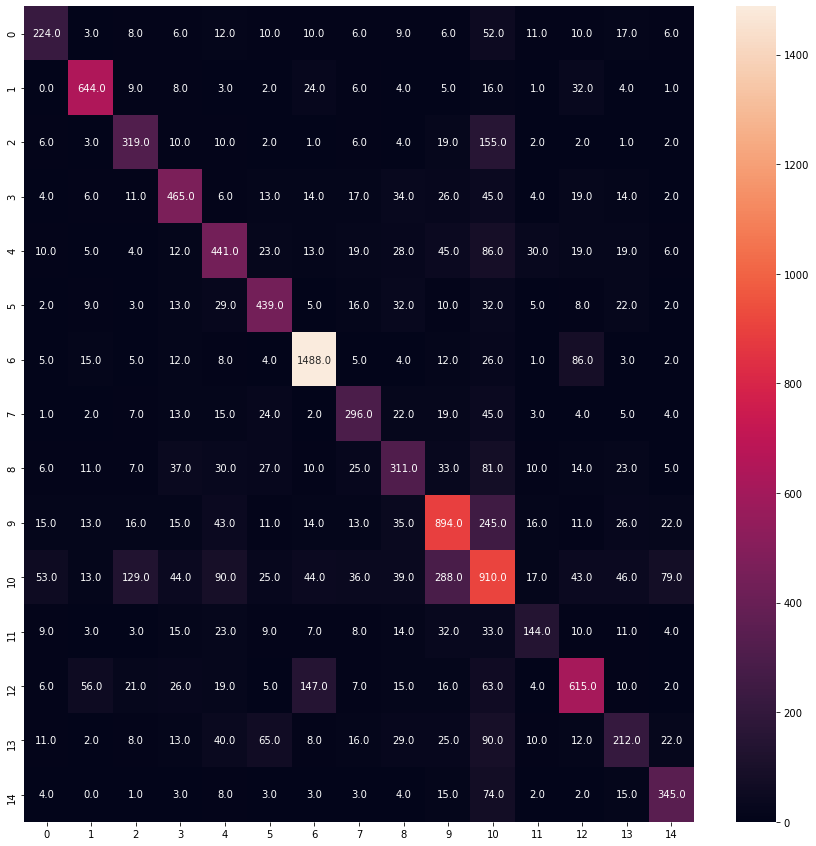

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

7]LINEAR SVM WITH TF-IDF VECTOR

In [56]:
# Linear SVM with TF-IDF Vector

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

svm1= LinearSVC()
svm1.fit(tfidf_train,y_train)
y_pred_svm1_tfidf= svm1.predict(tfidf_test)
print(confusion_matrix(y_test,y_pred_svm1_tfidf))
print(classification_report(y_test,y_pred_svm1_tfidf))
print(accuracy_score(y_test,y_pred_svm1_tfidf))

[[   0    0    2    0    0    0    0    0    0    0  388    0    0    0
     0]
 [   0    0    1    0    0    0    0    0    0    0  757    0    1    0
     0]
 [   0    0    8    0    1    0    0    0    0    0  533    0    0    0
     0]
 [   0    0    3    0    0    0    0    0    0    0  675    0    2    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  760    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  626    0    1    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 1669    0    7    0
     0]
 [   0    0   11    0    1    0    0    0    0    0  450    0    0    0
     0]
 [   0    0    4    0    0    0    0    0    0    0  625    0    1    0
     0]
 [   0    0    2    0    0    0    0    0    0    0 1386    0    1    0
     0]
 [   0    0   18    0    0    0    0    0    0    0 1838    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  325    0    0    0
     0]
 [   0    0    4    0    0    0    0    

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

               autos       0.00      0.00      0.00       390
            baseball       0.00      0.00      0.00       759
               crime       0.15      0.01      0.03       542
       entertainment       0.00      0.00      0.00       680
             finance       0.00      0.00      0.00       760
        foodanddrink       0.00      0.00      0.00       627
            football       0.00      0.00      0.00      1676
              health       0.00      0.00      0.00       462
           lifestyle       0.00      0.00      0.00       630
                news       0.00      0.00      0.00      1389
              newsus       0.15      0.99      0.26      1856
scienceandtechnology       0.00      0.00      0.00       325
              sports       0.64      0.02      0.04      1012
              travel       0.00      0.00      0.00       563
             weather       0.00      0.00      0.00       482

      

In [57]:
cm = confusion_matrix(y_test, y_pred_svm1_tfidf)

[]

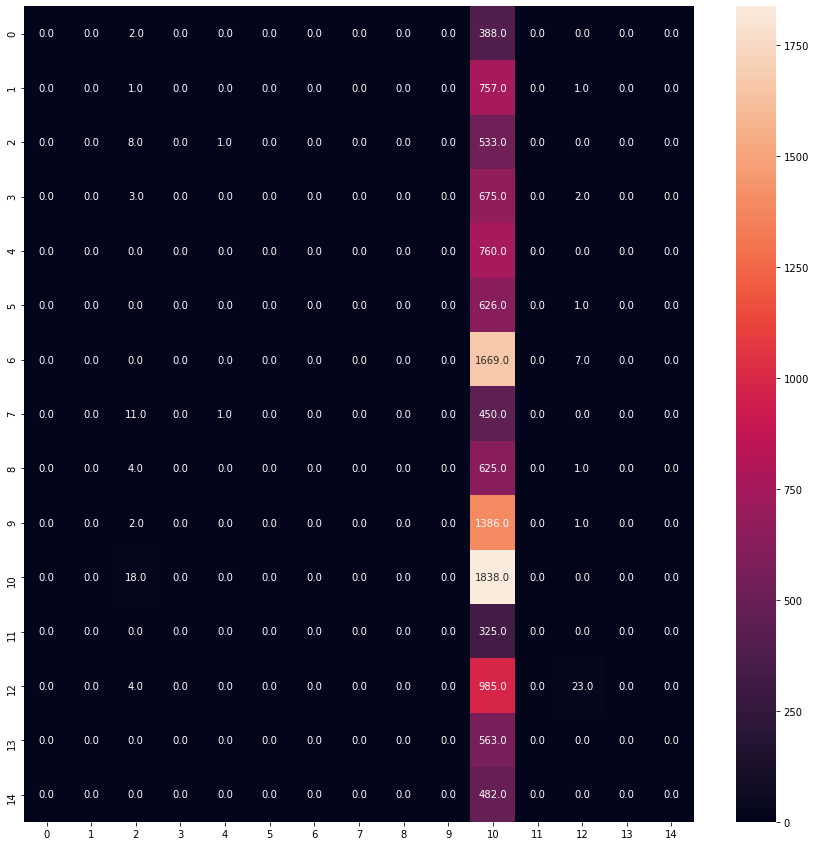

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()

8]BY APPLING LOGISTIC REGRESSION WITH COUNTVECTORIZER AND TF-IDF TRANSFORMER

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import string

In [60]:
lr = Pipeline ([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())
               ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 192    4    2    5   14    9   12    2   12    5  103    7    9    8
     6]
 [   2  621    5    9    8    2   43    2    4    6   30    0   25    1
     1]
 [   4    0  264    2    5    1    0    4    1   10  249    0    1    0
     1]
 [   1    5    7  461    7    4   17    4   34   21   93    2   18    6
     0]
 [   7    3    3    5  433   19   19   13   31   42  132   21   14   15
     3]
 [   0    7    1   18   23  427   12    8   27   13   59    1   10   18
     3]
 [   1    6    1    5    5    3 1527    2    3    9   41    0   71    1
     1]
 [   0    2    4    9   13   29    5  274   27   14   70    4    5    4
     2]
 [   3    8    4   33   33   21   14   17  309   31  129    4   12    7
     5]
 [   5    8   11   11   30    6   16    7   29  895  317   10   10   21
    13]
 [  28    7   86   33   54   24   41   17   31  275 1124   10   32   30
    64]
 [   5    1    2   16   26    6   10    9   17   27   56  131    7   10
     2]
 [   4   46   11   18    9    2  153    

9]BY APPLING NAIVE BAYES CLASSIFIER WITH COUNTVECTORIZER AND TF-IDFTRANSFORMER

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
naivebayes = Pipeline ([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB ())
               ])

naivebayes.fit(X_train,y_train)
y_pred1 = naivebayes.predict(X_test)

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[  44    1    0    1    7    4   59    1    3   11  254    1    4    0
     0]
 [   0  437    0    1    1    0  219    0    1    7   81    0   12    0
     0]
 [   0    0   19    0    0    0    1    0    0    4  518    0    0    0
     0]
 [   0    2    0  268    2    2  117    1   10   25  240    0   12    1
     0]
 [   1    0    0    1  209    7   65    0    7   72  391    2    4    1
     0]
 [   0    6    0    4    5  315   57    0    9   13  216    0    2    0
     0]
 [   0    0    0    0    0    0 1599    0    0    6   58    0   13    0
     0]
 [   0    0    0    1    7   17   64   97    8   15  252    0    1    0
     0]
 [   0    4    0   16    9    5   63    0  181   26  322    0    3    1
     0]
 [   0    5    1    1    6    0   40    0    3  846  480    0    2    2
     3]
 [   0    4    1    4    8    4   55    0    5  244 1520    1    7    0
     3]
 [   1    1    0    5   12    3   44    0    5   45  180   23    3    2
     1]
 [   0   34    1    4    0    0  345    

10]BY APPLING XGBOOST CLASSIFIER WITH COUNTVECTORIZER AND TF-IDFTRANSFORMER

In [63]:
!pip install xgboost
from xgboost import XGBClassifier

In [64]:
xgboost = Pipeline ([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier())
               ])

xgboost.fit(X_train,y_train)
y_pred2 = xgboost.predict(X_test)

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:09:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  44    1    0    1    7    4   59    1    3   11  254    1    4    0
     0]
 [   0  437    0    1    1    0  219    0    1    7   81    0   12    0
     0]
 [   0    0   19    0    0    0    1    0    0    4  518    0    0    0
     0]
 [   0    2    0  268    2    2  117    1   10   25  240    0   12    1
     0]
 [   1    0    0    1  209    7   65    0    7   72  391    2    4    1
     0]
 [   0    6    0    4    5  315   57    0    9   13  216    0    2    0
     0]
 [   0    0    0    0    0    0 1599    0    0    6   58    0   13    0
     0]
 [   0    0    0    1    7   17   64   97    8   15  252    0    1    0
     0]
 [   0    4    0   16    9    5   63    0  181   26  322    0    3    1
     0]
 [   0    5    1    1    6 

In [66]:
cm = confusion_matrix(y_test, y_pred2)

[]

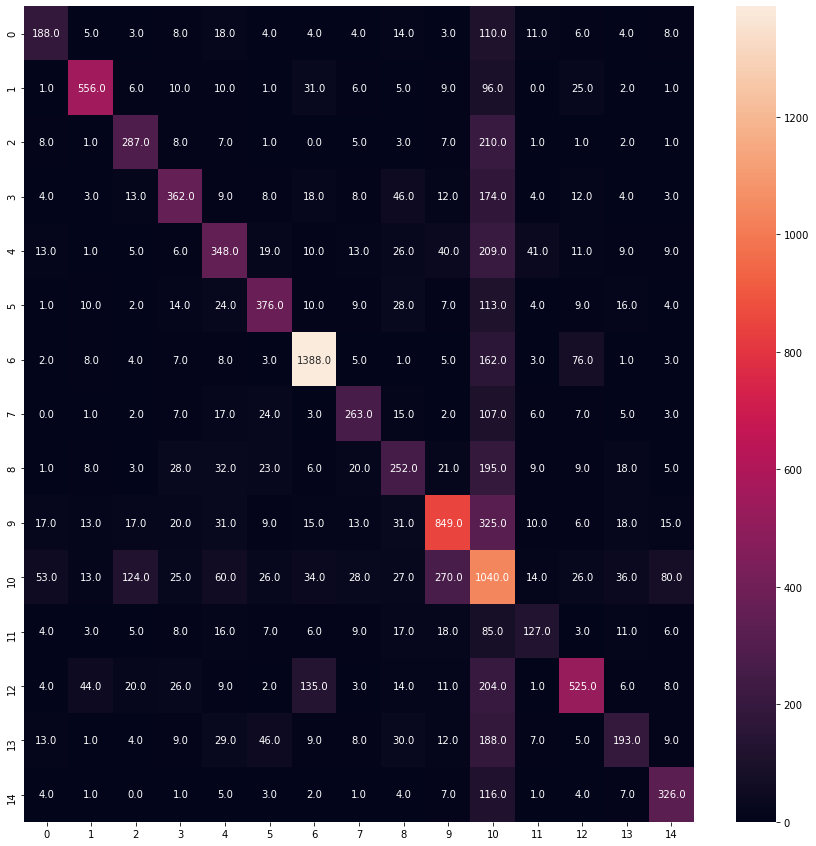

In [67]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".1f", ax=ax)

ax.plot()